In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [36]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']) 

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
   

Using real-time data augmentation.


In [7]:
 ##with data agumentation and and drop out layer and relu layers
 history1=model1.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





1563/1563 [==============================] - 291s 186ms/step - loss: 1.8732 - acc: 0.3092 - val_loss: 1.6034 - val_acc: 0.4180
Epoch 2/10
1563/1563 [==============================] - 293s 188ms/step - loss: 1.5928 - acc: 0.4156 - val_loss: 1.4065 - val_acc: 0.4946
Epoch 3/10
1563/1563 [==============================] - 294s 188ms/step - loss: 1.4760 - acc: 0.4645 - val_loss: 1.3000 - val_acc: 0.5370
Epoch 4/10
1563/1563 [==============================] - 294s 188ms/step - loss: 1.4000 - acc: 0.4957 - val_loss: 1.2488 - val_acc: 0.5597
Epoch 5/10
1563/1563 [==============================] - 297s 190ms/step - loss: 1.3283 - acc: 0.5278 - val_loss: 1.1708 - val_acc: 0.5924
Epoch 6/10
1563/1563 [==============================] - 300s 192ms/step - loss: 1.2739 - acc: 0.5466 - val_loss: 1.1219 - val_acc: 0.6095
Epoch 7/10
1563/1563 [==============================] - 299s 191ms/ste

In [75]:
##with dropout layer without data agumentation
history3=model1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 271s 5ms/step - loss: nan - acc: 0.1001 - val_loss: nan - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 268s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 270s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 266s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 266s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 267s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 265s 5ms/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/10
50000/50000 [==

In [9]:
print(history1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
def neural_dense(num):
  model = Sequential()
  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  for i in range(num):
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='sigmoid'))
  model.summary()
  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
 
  history=model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),epochs=epochs,
                        validation_data=(x_test, y_test),workers=4,verbose=1)
  return history


In [53]:
nn0=neural_dense(0)
nn1=neural_dense(1)
nn2=neural_dense(2)
nn3=neural_dense(3)
nn4=neural_dense(4)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 4.7267 - acc: 0.0993 - val_loss: 3.5893 - val_acc: 0.1000
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 5.6040 - acc: 0.1006 - val_

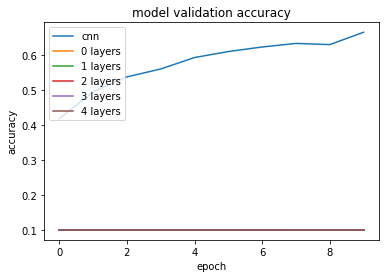

In [64]:
plt.plot(history1.history['val_acc'])
plt.plot(nn0.history['val_acc'])
plt.plot(nn1.history['val_acc'])
plt.plot(nn2.history['val_acc'])
plt.plot(nn3.history['val_acc'])
plt.plot(nn4.history['val_acc'])
#plt.plot(history1.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn', '0 layers','1 layers','2 layers','3 layers','4 layers'], loc='upper left')

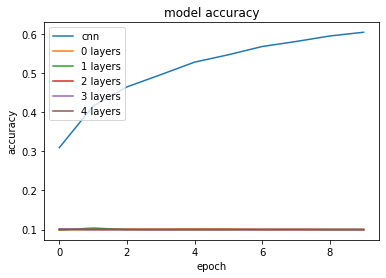

In [65]:
plt.plot(history1.history['acc'])
plt.plot(nn0.history['acc'])
plt.plot(nn1.history['acc'])
plt.plot(nn2.history['acc'])
plt.plot(nn3.history['acc'])
plt.plot(nn4.history['acc'])
#plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn', '0 layers','1 layers','2 layers','3 layers','4 layers'], loc='upper left')

Part A <br> The cifar10_cnn worked best as it have the cnn layers which is used for images. On the other hand the other models were equivalent for all the hidden layers. I think this is because we have dropped out after each layer and the number of nodes are same for each layer.

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('sigmoid'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('sigmoid'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [68]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']) 
##with data agumentation and and drop out layer and sigmoid layers
history2=model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),epochs=epochs,validation_data=(x_test, y_test),workers=4) 

Epoch 1/10
1563/1563 [==============================] - 291s 186ms/step - loss: 2.3325 - acc: 0.0997 - val_loss: 2.2322 - val_acc: 0.1551
Epoch 2/10
1563/1563 [==============================] - 290s 185ms/step - loss: 2.0180 - acc: 0.2386 - val_loss: 1.8812 - val_acc: 0.3136
Epoch 3/10
1563/1563 [==============================] - 289s 185ms/step - loss: 1.8959 - acc: 0.2909 - val_loss: 1.8012 - val_acc: 0.3318
Epoch 4/10
1563/1563 [==============================] - 291s 186ms/step - loss: 1.8453 - acc: 0.3093 - val_loss: 1.7574 - val_acc: 0.3351
Epoch 5/10
1563/1563 [==============================] - 292s 187ms/step - loss: 1.8197 - acc: 0.3154 - val_loss: 1.7615 - val_acc: 0.3481
Epoch 6/10
1563/1563 [==============================] - 291s 186ms/step - loss: 1.7937 - acc: 0.3279 - val_loss: 1.6916 - val_acc: 0.3712
Epoch 7/10
1563/1563 [==============================] - 290s 185ms/step - loss: 1.7549 - acc: 0.3431 - val_loss: 1.6707 - val_acc: 0.3822
Epoch 8/10
1563/1563 [============

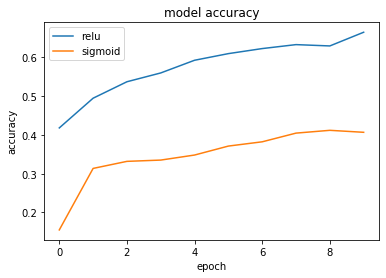

In [69]:
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['relu', 'sigmoid'], loc='upper left')

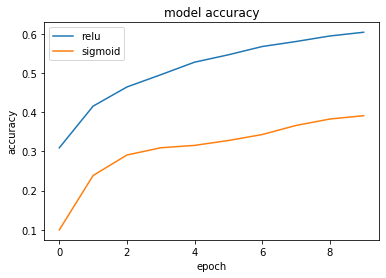

In [70]:
plt.plot(history1.history['acc'])
plt.plot(history2.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['relu', 'sigmoid'], loc='upper left')

Part B <br> The relu model works better here because it is giving a linear activation for the nodes whereas the sigmoid is coverting the values between 0 and 1 which is not needed here as the input is images.

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))


model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))

model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [0]:
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy']) 

In [73]:
##without dropout layer without data agumentation
history4=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 260s 5ms/step - loss: 2.7585 - acc: 0.4190 - val_loss: 1.2788 - val_acc: 0.5535
Epoch 2/10
50000/50000 [==============================] - 260s 5ms/step - loss: 1.1399 - acc: 0.6066 - val_loss: 1.1991 - val_acc: 0.5888
Epoch 3/10
50000/50000 [==============================] - 258s 5ms/step - loss: 0.9273 - acc: 0.6806 - val_loss: 1.0716 - val_acc: 0.6380
Epoch 4/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.7663 - acc: 0.7381 - val_loss: 1.2323 - val_acc: 0.6181
Epoch 5/10
50000/50000 [==============================] - 258s 5ms/step - loss: 0.6313 - acc: 0.7841 - val_loss: 1.1216 - val_acc: 0.6477
Epoch 6/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.5100 - acc: 0.8264 - val_loss: 1.1577 - val_acc: 0.6541
Epoch 7/10
50000/50000 [==============================] - 257s 5ms/step - loss: 0.4084 - acc: 0.8610 - val_loss: 1.1603 - 

In [74]:
##without dropout layer with data agumentation
history5=model3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4) 

Epoch 1/10
1563/1563 [==============================] - 280s 179ms/step - loss: 1.0470 - acc: 0.6546 - val_loss: 1.0496 - val_acc: 0.6611
Epoch 2/10
1563/1563 [==============================] - 279s 179ms/step - loss: 0.9500 - acc: 0.6801 - val_loss: 0.9209 - val_acc: 0.6940
Epoch 3/10
1563/1563 [==============================] - 280s 179ms/step - loss: 0.9135 - acc: 0.6935 - val_loss: 1.0661 - val_acc: 0.6615
Epoch 4/10
1563/1563 [==============================] - 280s 179ms/step - loss: 0.8768 - acc: 0.7026 - val_loss: 0.9340 - val_acc: 0.7061
Epoch 5/10
1563/1563 [==============================] - 283s 181ms/step - loss: 0.8588 - acc: 0.7104 - val_loss: 0.9231 - val_acc: 0.7086
Epoch 6/10
1563/1563 [==============================] - 275s 176ms/step - loss: 0.8395 - acc: 0.7170 - val_loss: 0.8646 - val_acc: 0.7228
Epoch 7/10
1563/1563 [==============================] - 274s 175ms/step - loss: 0.8275 - acc: 0.7216 - val_loss: 0.8311 - val_acc: 0.7289
Epoch 8/10
1563/1563 [============

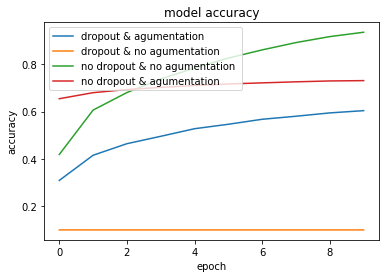

In [76]:
plt.plot(history1.history['acc'])
plt.plot(history3.history['acc'])
plt.plot(history4.history['acc'])
plt.plot(history5.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout & agumentation','dropout & no agumentation','no dropout & no agumentation ','no dropout & agumentation'], loc='upper left')

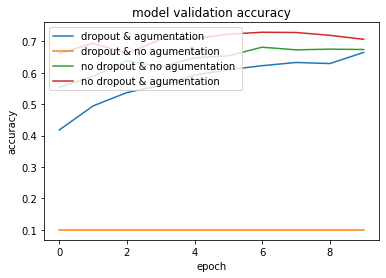

In [77]:
plt.plot(history1.history['val_acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history4.history['val_acc'])
plt.plot(history5.history['val_acc'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['dropout & agumentation','dropout & no agumentation','no dropout & no agumentation ','no dropout & agumentation'], loc='upper left')

Past C<br>Here the model with dropout layer and no agumentation is having a constant low value for the accuracy. hence for 100 epochs I think the other models will coverge to give us similar results for the 100 epochs as we can see that at the end of the 10 epochs the graphs started to concide with each other.